<a href="https://colab.research.google.com/github/Victor-KKKK/AI_study/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch

w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
    y = w * x + b
    return y

x = torch.tensor([4,7])
forward(x)



tensor([13., 22.], grad_fn=<AddBackward0>)

In [22]:
from torch.nn import Linear

torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

x = torch.tensor([[2.0], [3.3]]) # 여기서 []를 없애면 에러가 나네
print(x)
print(model(x))

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)
tensor([[2.0000],
        [3.3000]])
tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


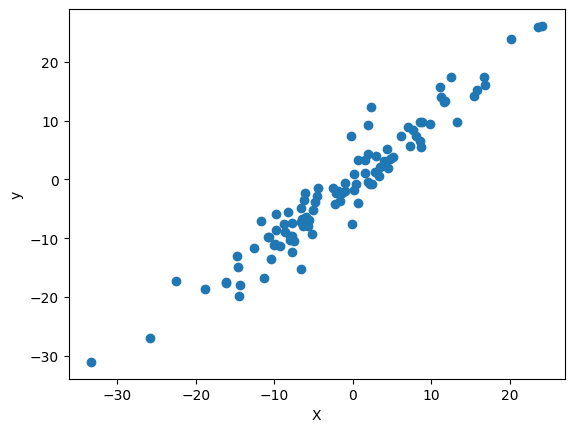

In [23]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X = torch.randn(100, 1) * 10
y = X + 3*torch.randn(100,1)

plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')


class LR(nn.Module):
  def __init__(self, inputsize, outputsize):
    super().__init__() # super()에 괄호 있어야 함.
    self.linear = nn.Linear(inputsize, outputsize)
  def forward(self, x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1,1)
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

0.5152631998062134
-0.44137823581695557
[-30  30]


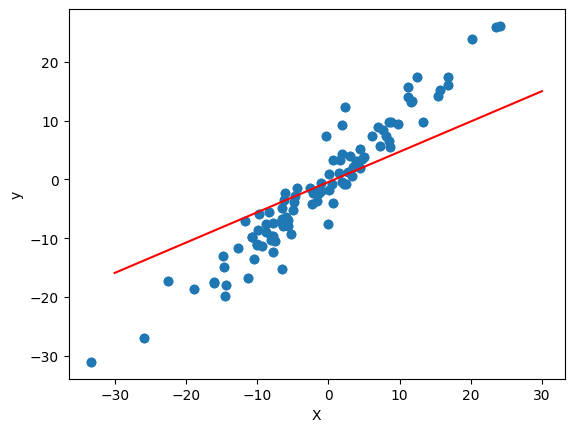

In [24]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

X = torch.randn(100, 1) * 10
y = X + 3*torch.randn(100,1)

plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')


class LR(nn.Module):
  def __init__(self, inputsize, outputsize):
    super().__init__() # super()에 괄호 있어야 함.
    self.linear = nn.Linear(inputsize, outputsize)
  def forward(self, x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1,1)

[w,b] = model.parameters()

def get_params():
  return ( w[0][0].item(), b[0].item() )

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  print(w1)
  print(b1)
  x1 = np.array([-30,30])
  print(x1)
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit('Initial Model')

In [26]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

epoches = 500
losses = []
'''
모델의 학습 순서는 아래와 같음
    optimizer.zero_grad()       # 🔹 기울기 초기화
    output = model(data)        # 🔹 순전파
    loss = loss_fn(output, target)  # 🔹 손실 계산
    loss.backward()             # 🔹 역전파 (기울기 계산)
    optimizer.step()            # 🔹 파라미터 업데이트

'''
for i in range(epoches):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss: 8.392027854919434
epoch: 1 loss: 8.391962051391602
epoch: 2 loss: 8.391899108886719
epoch: 3 loss: 8.39183521270752
epoch: 4 loss: 8.39177417755127
epoch: 5 loss: 8.391714096069336
epoch: 6 loss: 8.391656875610352
epoch: 7 loss: 8.391597747802734
epoch: 8 loss: 8.39154052734375
epoch: 9 loss: 8.391484260559082
epoch: 10 loss: 8.391430854797363
epoch: 11 loss: 8.391377449035645
epoch: 12 loss: 8.391324043273926
epoch: 13 loss: 8.39127254486084
epoch: 14 loss: 8.39122200012207
epoch: 15 loss: 8.391172409057617
epoch: 16 loss: 8.391124725341797
epoch: 17 loss: 8.391077041625977
epoch: 18 loss: 8.391030311584473
epoch: 19 loss: 8.390985488891602
epoch: 20 loss: 8.390939712524414
epoch: 21 loss: 8.39089584350586
epoch: 22 loss: 8.390852928161621
epoch: 23 loss: 8.390810012817383
epoch: 24 loss: 8.390769004821777
epoch: 25 loss: 8.390728950500488
epoch: 26 loss: 8.390689849853516
epoch: 27 loss: 8.390649795532227
epoch: 28 loss: 8.390612602233887
epoch: 29 loss: 8.390573501586